In [1]:
!pip install rouge_score
!pip install datasets
!pip install accelerate -U
!pip install transformers[torch]
!pip install accelerate -U
!pip install Rouge

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=e40901ab4734b909282d6b43d93b5077e7200a9c0fc7bc286022bd05f5013e3f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data

In [3]:
# import tarfile
# import os

# tgz_file_path = '/kaggle/input/stories-highlights/dailymail_stories.tgz'
# extract_dir = 'dailymail_stories'

# os.makedirs(extract_dir, exist_ok=True)

# with tarfile.open(tgz_file_path, "r:gz") as tar:
#     tar.extractall(path=extract_dir)

# print("Extraction completed!")

import tarfile
import os

tgz_file_path = '/content/drive/MyDrive/dailymail_stories.tgz'
extract_dir = 'dailymail_stories'

os.makedirs(extract_dir, exist_ok=True)

try:
    with tarfile.open(tgz_file_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
        print("Extraction is doone!")
except Exception as e:
    print(f"Error: {e}")


Extraction is doone!


In [4]:
# import torch

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(device)

import torch

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

print(device)

cuda


In [5]:
pip list | grep torch

torch                              2.0.0
torchaudio                         2.5.1+cu121
torchdata                          0.6.0
torchsummary                       1.5.1
torchtext                          0.15.1
torchvision                        0.20.1+cu121


In [8]:
# !python --version

#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torchtext==0.15.1 #Have to restart


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [8]:
import torch
import torchtext
print(torch.__version__)
print(torchtext.__version__)


2.0.0+cu117
0.15.1+cpu


In [9]:
import os
import torch.nn as nn
from nltk.corpus import stopwords
from torchtext.vocab import build_vocab_from_iterator
import torch.optim as optim
from bs4 import BeautifulSoup
import nltk
import random
import torch.nn.functional as F
from torchtext.data.utils import get_tokenizer
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import re


In [10]:
def read_story_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.read().splitlines()

    story_lines = []
    highlight_lines = []
    reading_highlights = False
    for line in lines:
        if line == "@highlight":
            reading_highlights = True
            continue
        (highlight_lines if reading_highlights else story_lines).append(line)

    return ' '.join(story_lines), ' '.join(highlight_lines)





In [12]:

def ldata(data_path):
    articles = []
    highlights = []
    for filename in os.listdir(data_path):
        if filename.endswith('.story'):
            try:
                story, highlight = read_story_file(os.path.join(data_path, filename))
                articles.append(story)
                highlights.append(highlight)
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return articles, highlights

data_path = 'dailymail_stories/dailymail/stories'
data_articles, data_highlights =  ldata(data_path)


# Data Cleaning and Preprocessing

In [13]:
filtered_articles = [article for article, highlight in zip(data_articles, data_highlights) if len(highlight.split()) >= 4]
filtered_highlights = [highlight for highlight in data_highlights if len(highlight.split()) >= 4]

data_articles = filtered_articles
data_highlights = filtered_highlights


In [15]:
# Print article strings before cleaning
print("Articles before Cleanign")
for article in data_articles[:2]:
    print(article)

Articles before Cleanign
The family of a film worker who was killed in a train accident while shooting a movie near Savannah has reached a settlement with several defendants in a civil suit.  A statement from the Harris Penn Lowry law firm Wednesday said the settlement in a suit filed by the family of 27-year-old camera assistant Sarah Jones includes Unclaimed Freight Productions, Inc., Rayonier Fibers, LLC, and several others.  Jones was killed the first day of filming for a movie on musician Gregg Allman in February and attorneys say the terms of the settlement are confidential.  Settlement: The family of a film worker who was killed in a train accident while shooting a movie near Savannah has reached a settlement with several defendants in a civil suit  Confidential: A statement from the Harris Penn Lowry law firm Wednesday said the settlement with Unclaimed Freight Productions, Inc., Rayonier Fibers, LLC, and several others will remain confidential  The statement says CSX railroad 

In [22]:
data_highlight, data_article = data_highlights[:5000], data_articles[:5000]
len(data_highlight)

5000

In [23]:
len(data_article)

5000

# Splitting the data


In [27]:
from sklearn.model_selection import train_test_split

def split_data(articles, highlights, first_split_ratio, second_split_ratio, random_seed):
    train_articles, temp_articles, train_highlights, temp_highlights = train_test_split(
        articles, highlights, test_size=first_split_ratio, random_state=random_seed
    )
    val_articles, test_articles, val_highlights, test_highlights = train_test_split(
        temp_articles, temp_highlights, test_size=second_split_ratio, random_state=random_seed
    )
    return train_articles, val_articles, test_articles, train_highlights, val_highlights, test_highlights

train_articles, val_articles, test_articles, train_highlights, val_highlights, test_highlights = split_data(
    data_article, data_highlight, 0.2, 0.5, 42
)

print(f"Train set size: {len(train_articles)}")
print(f"Validation set size: {len(val_articles)}")
print(f"Test set size: {len(test_articles)}")
data_articles[0]

Train set size: 4000
Validation set size: 500
Test set size: 500


'The family of a film worker who was killed in a train accident while shooting a movie near Savannah has reached a settlement with several defendants in a civil suit.  A statement from the Harris Penn Lowry law firm Wednesday said the settlement in a suit filed by the family of 27-year-old camera assistant Sarah Jones includes Unclaimed Freight Productions, Inc., Rayonier Fibers, LLC, and several others.  Jones was killed the first day of filming for a movie on musician Gregg Allman in February and attorneys say the terms of the settlement are confidential.  Settlement: The family of a film worker who was killed in a train accident while shooting a movie near Savannah has reached a settlement with several defendants in a civil suit  Confidential: A statement from the Harris Penn Lowry law firm Wednesday said the settlement with Unclaimed Freight Productions, Inc., Rayonier Fibers, LLC, and several others will remain confidential  The statement says CSX railroad and Meddin Studios are s

# Texual cleaning with stopwords

In [28]:
stopword_mapping = {
    "he'll": "he will", "how'll": "how will", "how'd'y": "how do you", "wasn't": "was not",
    "we've": "we have", "you're": "you are", "he'd": "he would", "we'll've": "we will have",
    "shan't've": "shall not have", "she'd've": "she would have", "why's": "why is",
    "mightn't've": "might not have", "this's": "this is", "i'll": "i will",
    "they're": "they are", "y'all'd've": "you all would have", "there'd've": "there would have",
    "y'all": "you all", "o'clock": "of the clock", "mightn't": "might not",
    "when's": "when is", "you'd": "you would", "what's": "what is", "it'd": "it would",
    "that'd": "that would", "she's": "she is", "i'm": "i am", "haven't": "have not",
    "ain't": "is not", "you've": "you have", "y'all're": "you all are", "can't": "cannot",
    "you're": "you are", "it'll": "it will", "you'll've": "you will have", "doesn't": "does not",
    "i've": "i have", "you'd've": "you would have", "you'll": "you will", "ma'am": "madam",
    "what're": "what are", "won't": "will not", "how's": "how is", "that'd've": "that would have",
    "we'd": "we would", "couldn't": "could not", "could've": "could have", "they'd've": "they would have",
    "why've": "why have", "shall not": "shall not", "weren't": "were not", "they've": "they have",
    "who's": "who is", "he'll've": "he will have", "so've": "so have", "we're": "we are",
    "won't've": "will not have", "who'll": "who will", "needn't've": "need not have",
    "you all have": "you all have", "to've": "to have", "there's": "there is",
    "how'd": "how did", "they'll": "they will", "where've": "where have", "could've": "could have",
    "she'll": "she will", "shouldn't've": "should not have", "i'd've": "i would have",
    "i'll've": "i will have", "shouldn't": "should not", "who've": "who have",
    "here's": "here is", "hasn't": "has not", "we'd've": "we would have", "what've": "what have",
    "wouldn't've": "would not have", "he's": "he is", "mustn't": "must not", "when've": "when have",
    "might've": "might have", "how's": "how is", "wouldn't": "would not", "who'll've": "who will have",
    "she'll've": "she will have", "will've": "will have", "aren't": "are not",
    "what'll've": "what will have", "mustn't've": "must not have", "he'd've": "he would have",
    "let's": "let us", "what'll": "what will", "who is": "who is", "isn't": "is not",
    "she'd": "she would", "needn't": "need not", "there'd": "there would", "that is": "that is",
    "they'd": "they would", "should've": "should have", "he is": "he is", "I'd": "I would",
    "aren't": "are not", "you'd": "you would", "mayn't": "may not", "so's": "so as",
    "that'd've": "that would have", "because": "'cause", "I'll": "I will",
    "sha'n't": "shall not", "won't've": "will not have", "what's": "what is", "it'd've": "it would have",
    "you've": "you have", "haven't": "have not", "you all would have": "y'all'd've"
}


In [29]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def text_cleaner(text, stopword_mapping=None, remove_stopwords=True):
    text = text.lower()
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text)
    if remove_stopwords and stopword_mapping:
        text = ' '.join([stopword_mapping.get(t, t) for t in text.split()])
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = re.sub(r'[m]{2,}', 'mm', text)
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def articles_clean(article) :
    clean_article = text_cleaner(article)
    word_tokens = [w for w in clean_article.split() if not w in stop_words]
    article_words = [i for i in word_tokens if len(i) > 1]
    return (" ".join(article_words)).strip()

def summary_clean(summary) :
    clean_summary = text_cleaner(summary)
    word_tokens = clean_summary.split()
    summary_words = [i for i in word_tokens if len(i) > 1]
    return (" ".join(summary_words)).strip()

In [31]:
cleaned_data = {
    "train_articles": [articles_clean(t) for t in train_articles],
    "train_highlights": [summary_clean(t) for t in train_highlights],
    "val_articles": [articles_clean(t) for t in val_articles],
    "val_highlights": [summary_clean(t) for t in val_highlights],
    "test_articles": [articles_clean(t) for t in test_articles],
    "test_highlights": [summary_clean(t) for t in test_highlights],
}

cleaned_train_articles = cleaned_data["train_articles"]
cleaned_train_highlights = cleaned_data["train_highlights"]
cleaned_val_articles = cleaned_data["val_articles"]
cleaned_val_highlights = cleaned_data["val_highlights"]
cleaned_test_articles = cleaned_data["test_articles"]
cleaned_test_highlights = cleaned_data["test_highlights"]


<ipython-input-29-d0cc18b31ec5>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [34]:
print("Cleaned Articles:")
for article in cleaned_train_articles[:2]:
    print(article)

cleaned_train_articles[0]

Cleaned Articles:
federico fazio believes tottenham players disposal challenge title operate unit year old argentina international moved white hart lane summer like many new faces spurs last months struggled make impact already picked two red cards nine first team outings fazio yet show type form saw heart sevilla team europa league last season federico fazio struggled make impact since joining tottenham summer mauricio pochettino tenure tottenham started well former southampton boss seeing side lose four six barclays premier league home games far campaign despite stuttering start well uncertainty future ownership new stadium chairman daniel levy fazio feels sheer talent shine defender disagreed emmanuel adebayor club supporters stop showing dissatisfaction instead urged players gel together turn form around think tottenham good players fight first position premier league said fazio played argentina win croatia upton park wednesday fight champions league europa league need improve like

'federico fazio believes tottenham players disposal challenge title operate unit year old argentina international moved white hart lane summer like many new faces spurs last months struggled make impact already picked two red cards nine first team outings fazio yet show type form saw heart sevilla team europa league last season federico fazio struggled make impact since joining tottenham summer mauricio pochettino tenure tottenham started well former southampton boss seeing side lose four six barclays premier league home games far campaign despite stuttering start well uncertainty future ownership new stadium chairman daniel levy fazio feels sheer talent shine defender disagreed emmanuel adebayor club supporters stop showing dissatisfaction instead urged players gel together turn form around think tottenham good players fight first position premier league said fazio played argentina win croatia upton park wednesday fight champions league europa league need improve like team like team t

# Tokenizing

In [39]:

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def print_tokenized_highlights(highlights, limit=5):
    print("Highlights and their tokenized lists:")
    for highlight in highlights[:limit]:
        print(highlight)
        print(word_tokenize(highlight))
print_tokenized_highlights(cleaned_train_highlights)


Highlights and their tokenized lists:
federico fazio believes tottenham have the players to challenge for title spurs have lost four of their six barclays premier league home games defender played in argentina win over croatia on wednesday night
['federico', 'fazio', 'believes', 'tottenham', 'have', 'the', 'players', 'to', 'challenge', 'for', 'title', 'spurs', 'have', 'lost', 'four', 'of', 'their', 'six', 'barclays', 'premier', 'league', 'home', 'games', 'defender', 'played', 'in', 'argentina', 'win', 'over', 'croatia', 'on', 'wednesday', 'night']
experts claims the plumper woman who appeared at court could not be gu kailai suggestions that the convicted murderer paid someone else to take her place media denied access to court to hear trial of china jackie kennedy
['experts', 'claims', 'the', 'plumper', 'woman', 'who', 'appeared', 'at', 'court', 'could', 'not', 'be', 'gu', 'kailai', 'suggestions', 'that', 'the', 'convicted', 'murderer', 'paid', 'someone', 'else', 'to', 'take', 'her', '

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [40]:
cleaned_train_highlights[0]

'federico fazio believes tottenham have the players to challenge for title spurs have lost four of their six barclays premier league home games defender played in argentina win over croatia on wednesday night'

# **Building a Vocabulary Counter**

In [42]:
from collections import Counter
from nltk.tokenize import word_tokenize

def build_vocab(highlights):
    tokenized = [word_tokenize(highlight) for highlight in highlights]
    return Counter([word for tokens in tokenized for word in tokens])

vocab = build_vocab(cleaned_train_highlights)
print("Top 10 vocabulary words:", vocab.most_common(10))


Top 10 vocabulary words: [('the', 8238), ('to', 5416), ('in', 4968), ('and', 4259), ('of', 4197), ('was', 2359), ('for', 2265), ('on', 2135), ('he', 1624), ('is', 1621)]


# Data Vizualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

train_text_lengths = list(map(lambda x: len(x.split()), cleaned_train_articles))
train_summary_lengths = list(map(lambda x: len(x.split()), cleaned_train_highlights))
word_frequencies = Counter(word for text in cleaned_train_articles for word in text.split())
mean_text_length, mean_summary_length = map(lambda x: sum(x) / len(x), [train_text_lengths, train_summary_lengths])

print(f"Mean text length: {mean_text_length}")
print(f"Mean summary length: {mean_summary_length}")

lengths_df = pd.DataFrame({'Text Lengths': train_text_lengths, 'Summary Lengths': train_summary_lengths})


Mean text length: 380.68175
Mean summary length: 49.1945


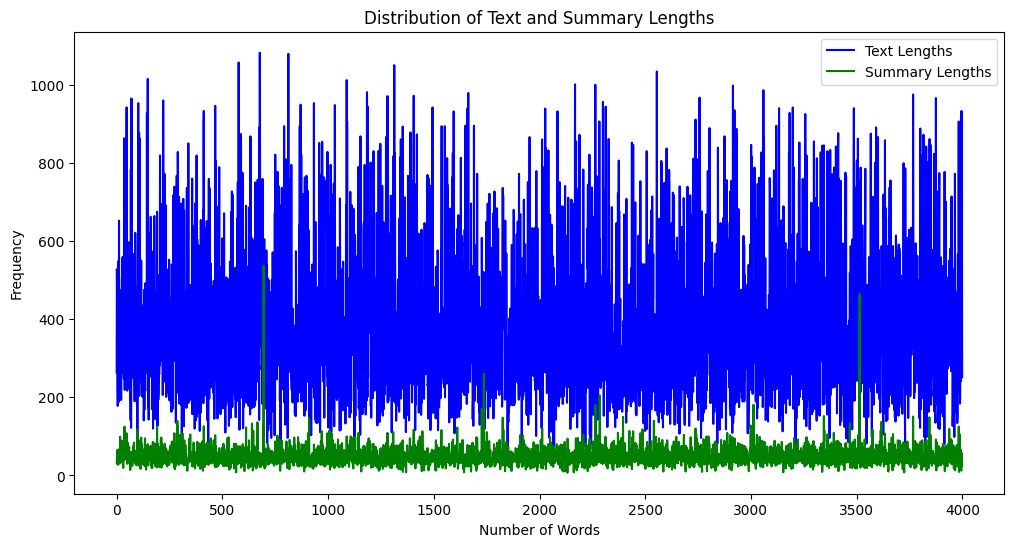

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=lengths_df['Text Lengths'], label='Text Lengths', color='blue')
sns.lineplot(data=lengths_df['Summary Lengths'], label='Summary Lengths', color='green')
plt.title('Distribution of Text and Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.boxplot(train_text_lengths, ax=ax[0], palette="Blues")
ax[0].set_title('Text Lengths')
ax[0].set_xlabel('Number of Words')
sns.boxplot(train_summary_lengths, ax=ax[1], palette="Greens")
ax[1].set_title('Summary Lengths')
ax[1].set_xlabel('Number of Words')
plt.suptitle('Box Plots of Text and Summary Lengths')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()


<ipython-input-51-de1faaaf9052>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_text_lengths, ax=ax[0], palette="Blues")
<ipython-input-51-de1faaaf9052>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_summary_lengths, ax=ax[1], palette="Greens")


In [52]:
# Convert word frequencies to DataFrame for plotting
word_freq_df = pd.DataFrame(word_frequencies.most_common(20), columns=['Word', 'Frequency'])

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


<ipython-input-54-04f52a4998d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


In [56]:
pip list | grep torch

torch                              2.0.0
torchaudio                         2.5.1+cu121
torchdata                          0.6.0
torchsummary                       1.5.1
torchtext                          0.15.1
torchvision                        0.20.1+cu121


In [57]:
!pip uninstall torch torchvision torchaudio torchtext -y

Found existing installation: torch 2.0.0
Uninstalling torch-2.0.0:
  Successfully uninstalled torch-2.0.0
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Found existing installation: torchtext 0.15.1
Uninstalling torchtext-0.15.1:
  Successfully uninstalled torchtext-0.15.1


In [64]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration, BartTokenizer, BartForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict

data_dict = {
    'train': (cleaned_train_articles, cleaned_train_highlights),
    'validation': (cleaned_val_articles, cleaned_val_highlights),
    'test': (cleaned_test_articles, cleaned_test_highlights)
}

dataset = DatasetDict({key: Dataset.from_dict({'article': value[0], 'highlights': value[1]}) for key, value in data_dict.items()})
dataset['train']['highlights'][0]

'federico fazio believes tottenham have the players to challenge for title spurs have lost four of their six barclays premier league home games defender played in argentina win over croatia on wednesday night'

# Loading pretrained models with our dataset

In [66]:
from transformers import EncoderDecoderModel, BertTokenizer

def tokenize_inputs(inputs, tokenizer, max_length):
    return tokenizer(inputs, max_length=max_length, truncation=True, padding='max_length')

def tokenize_targets(targets, tokenizer, max_length):
    return tokenizer(targets, max_length=max_length, truncation=True, padding='max_length')

def preprocess_data(dataset, tokenizer, max_input_length=400, max_target_length=50):
    tokenized_inputs = tokenize_inputs(dataset['article'], tokenizer, max_input_length)
    tokenized_targets = tokenize_targets(dataset['highlights'], tokenizer, max_target_length)

    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    return tokenized_inputs

def tokenize_and_preprocess(dataset, tokenizer):
    return dataset.map(lambda x: preprocess_data(x, tokenizer), batched=True)


In [67]:
model_names = ['patrickvonplaten/bert2bert_cnn_daily_mail', 'facebook/bart-base', 'google-t5/t5-base']

model_classes = {
    'bert': (BertTokenizer, EncoderDecoderModel),
    'bart': (BartTokenizer, BartForConditionalGeneration),
    't5': (T5Tokenizer, T5ForConditionalGeneration)
}

models, tokenizers = {}, {}

for model_name in model_names:
    for key, (tokenizer_class, model_class) in model_classes.items():
        if key in model_name:
            tokenizers[model_name] = tokenizer_class.from_pretrained(model_name)
            models[model_name] = model_class.from_pretrained(model_name).to(device)
            break

tokenized_datasets = {model_name: tokenize_and_preprocess(dataset, tokenizers[model_name]) for model_name in model_names}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pa

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [70]:
from transformers import EncoderDecoderModel, BertTokenizer, EncoderDecoderConfig,BertConfig
tokenized_datasets[model_name]['validation']['highlights'][:10]


['trevor cole sexually abused seven boys over period of nine years he attacked them on isolated forest roads under pretence of teaching them also invited one boy to watch porn and exposed himself it was reported paedophile now faces jail after being convicted of string of offences',
 'scotland took the lead through shaun maloney before lee casciaro equalised with gibraltar first competitive goal steven fletcher maloney and steven naismith guided scotland to lead at half time fletcher completed his treble with two goals in the second half',
 'new book by retired cia official reveals waterboarding and other enhanced interrogation didn work on september mastermind',
 'adrian was west ham hero in their fa cup replay win over everton adrian saved joel robles effort before slotting home winning penalty keeper reveals that is the first penalty he has taken in professional game',
 'jets general manager john idzik also lost his job following abysmal record this season chicago bears fired coach 

In [71]:
tokenized_datasets[model_name]['validation']['labels'][0]

[3,
 929,
 1967,
 7632,
 15,
 6949,
 120,
 3,
 28493,
 2391,
 5234,
 147,
 1059,
 13,
 4169,
 203,
 3,
 88,
 17263,
 135,
 30,
 12996,
 5827,
 7540,
 365,
 7140,
 1433,
 13,
 2119,
 135,
 92,
 5374,
 80,
 4940,
 12,
 1605,
 5569,
 29,
 11,
 6666,
 2448,
 34,
 47,
 2196,
 2576,
 15,
 26,
 21144,
 15,
 1]

# Integrating with AI tool WANDB

In [ ]:
import wandb
import torch

wandb.init(project="text_summarization")

# Fine tuning the models

In [72]:
import wandb
def training_args(output_path):
    return TrainingArguments(
        output_dir=output_path,
        eval_strategy="epoch",
        learning_rate=5e-5,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        weight_decay=0.01,
        save_total_limit=1,
        num_train_epochs=5,
        max_steps=4000,
        logging_dir='./logs',
        logging_steps=10,
        gradient_checkpointing=True,
        fp16_opt_level="O2",
        report_to="wandb"
    )

# Training Google T5 model with fine tuning

In [ ]:
def train_and_evaluate_model(model_name, models, tokenizers, tokenized_datasets, output_dir):
    run = wandb.init(project="text_summarization", name=model_name.replace('/', '_'))
    model = models[model_name]
    tokenizer = tokenizers[model_name]
    args = training_args(output_path=f'{output_dir}/{model_name}')
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_datasets[model_name]['train'],
        eval_dataset=tokenized_datasets[model_name]['validation'],
        tokenizer=tokenizer
    )
    print(f"Training {model_name}...")
    trainer.train()
    print(f"Evaluating {model_name}...")
    results = trainer.evaluate()
    print(f"Results for {model_name}: {results}")
    model_filename = f"{model_name.replace('/', '_')}.pth"
    torch.save(trainer.model.state_dict(), model_filename)
    run.finish()
for model_name in ['google-t5/t5-base']:
    train_and_evaluate_model(model_name, models, tokenizers, tokenized_datasets, '/kaggle/working/wandb')


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Training google-t5/t5-base...


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

Evaluating google-t5/t5-base...


Results for google-t5/t5-base: {'eval_loss': 1.9016804695129395, 'eval_runtime': 4.9207, 'eval_samples_per_second': 40.645, 'eval_steps_per_second': 20.322, 'epoch': 5.0}


# Training Bert2Bert and Facebook bart models

In [ ]:
def train_and_evaluate_model(model_name, models, tokenizers, tokenized_datasets, output_dir):
    run = wandb.init(project="text_summarization", name=model_name.replace('/', '_'))
    model = models[model_name]
    tokenizer = tokenizers[model_name]
    args = training_args(output_path=f'{output_dir}/{model_name}')

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_datasets[model_name]['train'],
        eval_dataset=tokenized_datasets[model_name]['validation'],
        tokenizer=tokenizer
    )

    print(f"Training {model_name}...")
    trainer.train()
    print(f"Evaluating {model_name}...")
    results = trainer.evaluate()
    print(f"Results for {model_name}: {results}")

    model_filename = f"{model_name.replace('/', '_')}.pth"
    torch.save(trainer.model.state_dict(), model_filename)
    run.finish()

for model_name in ['patrickvonplaten/bert2bert_cnn_daily_mail', 'facebook/bart-base']:
    train_and_evaluate_model(model_name, models, tokenizers, tokenized_datasets, '/kaggle/working/wandb')


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Training patrickvonplaten/bert2bert_cnn_daily_mail...


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:623: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/opt/conda/lib/python3.10/site-packages/t

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/models/encoder_decoder/modeling_encoder_

Evaluating patrickvonplaten/bert2bert_cnn_daily_mail...


Results for patrickvonplaten/bert2bert_cnn_daily_mail: {'eval_loss': 3.001941204071045, 'eval_runtime': 4.797, 'eval_samples_per_second': 41.693, 'eval_steps_per_second': 20.846, 'epoch': 5.0}
Training facebook/bart-base...


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a Generation

Evaluating facebook/bart-base...


Results for facebook/bart-base: {'eval_loss': 2.5895910263061523, 'eval_runtime': 2.6537, 'eval_samples_per_second': 75.367, 'eval_steps_per_second': 37.684, 'epoch': 5.0}
Training google-t5/t5-base...


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

Evaluating google-t5/t5-base...


Results for google-t5/t5-base: {'eval_loss': 1.8289560079574585, 'eval_runtime': 4.9316, 'eval_samples_per_second': 40.555, 'eval_steps_per_second': 20.277, 'epoch': 5.0}


In [ ]:
model_names

['patrickvonplaten/bert2bert_cnn_daily_mail',
 'facebook/bart-base',
 'google-t5/t5-base']

In [74]:
dataset['train']['highlights'][0]

'federico fazio believes tottenham have the players to challenge for title spurs have lost four of their six barclays premier league home games defender played in argentina win over croatia on wednesday night'

In [ ]:
dataset['train']['article'][0]

'vladimir putin fighting flab luxury spanish health resort loved naomi campbell kylie minogue russian leader involved ugly spat prince charles reportedly signed anti ageing weight loss programme sha wellness clinic costa blanca respected spanish newspaper la razon said putin attacked prince wales saturday comparing hitler turned spa near alicante group models scroll video holiday detox president vladimir putin pictured russia reportedly travelled spain detox beautiful setting sha wellness clinic spain vladimir putin rumoured detoxing said stuck detox diet whole cereal grains beans veg daily cup miso soup stay followed russia annexation crimea march known much stay sha features suites set zen gardens swimming pools waterfalls cost long lasted one night stay sq metre royal suite guests offered heliport service private parking swimming pool costs night medical miracle sha wellness clinic promises help guests change lifestyle celebrity haunt kylie minogue naomi campbell gwyneth paltrow rep

# Evaluating the models

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=256,
    num_beams=8,
    length_penalty=0.8,
    forced_eos_token_id=1,
)
generated_summary={}
text=dataset['train']['article'][0]
for model_name, model in models.items():
    tokenizer = tokenizers[model_name]
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='longest').to(device)
    summary_ids = model.generate(inputs['input_ids'], attention_mask=inputs['attention_mask'], generation_config=generation_config)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summary[model_name] = summary
    print(f"Model: {model_name}")
    print(f"Summary: {summary}")
    print()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Model: patrickvonplaten/bert2bert_cnn_daily_mail

Summary: luxurious sha wellness clinic is popular with list celebrities naomi campbell and kylie minogue have both visited resort in spain putin is rumoured to have stayed at the spa after spate with prince charles russian president signed up for anti ageing and weight loss programme alcohol and sugar added to the drink alcohol was also used for the same degree of weight loss alcohol used alcohol and dysmorportivivivivivivy alcohol and sugar was added to the same amount alcohol and sugar was added to the diet alcohol and sugar alcohol to the same amount as per day alcohol alcohol and sugar added to the diet alcohol and sugar regime alcohol and sugar regime alcohol and the same amount of alcohol sapriment sapriment alcohol alcohol and the same amount of alcohol in the alcohol and the same amount as per cent of alcohol alcohol alcohol and alcohol used for the same amount of alcohol alcohol and alcohol and the same amount of alcohol alcoho

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Model: facebook/bart-base

Summary: vladimir putin is rumoured to have travelled to spain to detox spa putin has reportedly signed anti ageing weight loss programme at the sha wellness clinic in costa blanca respected spanish newspaper la razon said putin



Model: google-t5/t5-base

Summary: vladimir putin reportedly travelled to spain to detox at sha wellness clinic prince charles reportedly signed up to the programme he compared hitler to spa in alicante




In [ ]:
generated_summary_facebook=generated_summary['facebook/bart-base']
generated_summary_google=generated_summary['google-t5/t5-base']
generated_summary_bert2bert=generated_summary['patrickvonplaten/bert2bert_cnn_daily_mail']

# Evaluation metrics for each model

In [ ]:
import os

drive_path = '/content/drive/MyDrive/'
os.makedirs(drive_path, exist_ok=True)


In [ ]:
import torch

# Assuming 'trainers' is your dictionary of trained models
for model_name, trainer in trainers.items():
    # Create a safe filename by replacing '/' with '_'
    model_filename = f"{model_name.replace('/', '_')}.pth"
    full_path = os.path.join(drive_path, model_filename)

    # Save the model's state dictionary
    torch.save(trainer.model.state_dict(), full_path)
    print(f"Saved {model_name} model to {full_path}")


Saved patrickvonplaten/bert2bert_cnn_daily_mail model to /content/drive/MyDrive/patrickvonplaten_bert2bert_cnn_daily_mail.pth

Saved facebook/bart-base model to /content/drive/MyDrive/facebook_bart-base.pth

Saved google-t5/t5-base model to /content/drive/MyDrive/google-t5_t5-base.pth


In [ ]:
!pip install bert-score




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00




















































In [ ]:
import torch
from rouge import Rouge
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score as bert_score

generated_summary = generated_summary_facebook
reference_summary = dataset['train']['highlights'][0]
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
P, R, F1 = bert_score([generated_summary], [reference_summary], lang='en')
print("ROUGE Scores:")
for key, values in rouge_scores.items():
    print(f"{key}:")
    for measure, score in values.items():
        print(f"  {measure}: {score:.4f}")

print("for facebook-bart model")
print(f"BERT fbbart Precision: {P.item():.4f}")
print(f"BERT fbbart Recall: {R.item():.4f}")
print(f"BERT fbbart F1 Score: {F1.item():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ROUGE Scores:

rouge-1:

  r: 0.4634

  p: 0.5938

  f: 0.5205

rouge-2:

  r: 0.2273

  p: 0.2857

  f: 0.2532

rouge-l:

  r: 0.2927

  p: 0.3750

  f: 0.3288

for facebook-bart model

BERT Precision: 0.8584

BERT Recall: 0.8532

BERT F1 Score: 0.8558


In [ ]:
generated_summary = generated_summary_google
reference_summary = dataset['train']['highlights'][0]
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
P, R, F1 = bert_score([generated_summary], [reference_summary], lang='en')
print("ROUGE Scores:")
for key, values in rouge_scores.items():
    print(f"{key}:")
    for measure, score in values.items():
        print(f"  {measure}: {score:.4f}")

print("for google-t5 model")
print(f"BERT google-t5 Precision: {P.item():.4f}")
print(f"BERT google-t5 Recall: {R.item():.4f}")
print(f"BERT google-t5 F1 Score: {F1.item():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ROUGE Scores:

rouge-1:

  r: 0.3659

  p: 0.6522

  f: 0.4687

rouge-2:

  r: 0.0909

  p: 0.1538

  f: 0.1143

rouge-l:

  r: 0.1951

  p: 0.3478

  f: 0.2500

for google-t5 model

BERT Precision: 0.8605

BERT Recall: 0.8468

BERT F1 Score: 0.8536


In [ ]:
generated_summary = generated_summary_bert2bert
reference_summary = dataset['train']['highlights'][0]
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
P, R, F1 = bert_score([generated_summary], [reference_summary], lang='en')
print("ROUGE Scores:")
for key, values in rouge_scores.items():
    print(f"{key}:")
    for measure, score in values.items():
        print(f"  {measure}: {score:.4f}")

print("for bert2bert model")
print(f"BERT bert2bert Precision: {P.item():.4f}")
print(f"BERT bert2bert Recall: {R.item():.4f}")
print(f"BERT bert2bert F1 Score: {F1.item():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ROUGE Scores:

rouge-1:

  r: 1.0000

  p: 0.6721

  f: 0.8039

rouge-2:

  r: 1.0000

  p: 0.4681

  f: 0.6377

rouge-l:

  r: 1.0000

  p: 0.6721

  f: 0.8039

for bert2bert model

BERT Precision: 0.8077

BERT Recall: 0.9751

BERT F1 Score: 0.8836
